In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# 图像的直方图匹配

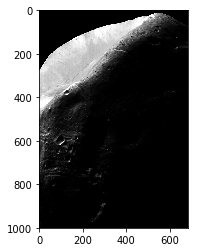

In [27]:
img=Image.open("dipum_images/dipum_images_ch03/Fig0310(a)(Moon Phobos).tif")
plt.figure()
plt.imshow(img)

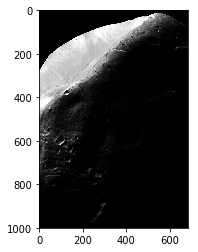

In [28]:
img_array=np.array(img)
plt.figure()
plt.imshow(img_array,'gray')

## 求取亮度上的像元个数

In [29]:
print(img_array.shape)
height=img_array.shape[0]
width=img_array.shape[1]
print(height,width)

(1000, 683)
1000 683


In [30]:
hist={}
nums=0
for i in range(height):
    for j in range(width):
        if(img_array[i,j] in hist):
            hist[img_array[i,j]]=hist[img_array[i,j]]+1
        else:
            hist[img_array[i,j]]=1
        if(img_array[i,j]!=0):
            nums=nums+1
del hist[0]            
print(hist)
print(nums)

{1: 23596, 76: 76, 61: 847, 100: 456, 134: 381, 140: 415, 180: 457, 185: 316, 209: 1725, 198: 2246, 158: 451, 169: 174, 175: 423, 149: 430, 126: 406, 87: 605, 81: 684, 88: 570, 147: 419, 163: 414, 204: 2192, 218: 1470, 182: 507, 164: 182, 165: 430, 138: 450, 142: 414, 190: 1465, 156: 478, 170: 429, 112: 411, 124: 427, 245: 653, 255: 3498, 233: 1010, 202: 2196, 172: 423, 224: 211, 154: 109, 153: 485, 98: 486, 221: 197, 212: 1751, 193: 1939, 186: 651, 171: 142, 135: 49, 118: 432, 131: 54, 128: 428, 110: 373, 103: 433, 132: 414, 120: 428, 116: 412, 77: 635, 121: 35, 130: 23, 62: 859, 107: 423, 251: 488, 230: 1195, 246: 87, 205: 2111, 106: 54, 102: 35, 146: 74, 67: 812, 74: 38, 231: 1064, 254: 493, 236: 941, 183: 400, 139: 92, 105: 447, 143: 79, 85: 593, 108: 35, 194: 2210, 238: 758, 241: 706, 242: 80, 201: 2322, 159: 153, 93: 561, 99: 55, 63: 785, 184: 465, 248: 564, 192: 288, 174: 145, 213: 1435, 181: 179, 150: 71, 92: 581, 82: 600, 71: 721, 125: 57, 68: 746, 123: 42, 250: 88, 210: 262, 

## 求亮度的概率 个数/总个数

In [31]:
for i in hist.keys():
    hist[i]=hist[i]/nums
print(hist)

{1: 0.09035316461997374, 76: 0.0002910171432072387, 61: 0.0032433094775859363, 100: 0.001746102859243432, 134: 0.0014589148889731307, 140: 0.0015891067688290005, 180: 0.0017499320321803693, 185: 0.0012100186480722029, 209: 0.00660532331621693, 198: 0.00860032241636129, 158: 0.0017269569945587452, 169: 0.0006662760910270991, 175: 0.0016197401523244995, 149: 0.0016465443628830608, 126: 0.0015546442123965645, 87: 0.0023166496268470973, 81: 0.0026191542888651482, 88: 0.00218262857405429, 147: 0.00160442346057675, 163: 0.0015852775958920633, 204: 0.008393547077766673, 218: 0.005628884217297906, 182: 0.0019413906790272369, 164: 0.0006969094745225979, 165: 0.0016465443628830608, 138: 0.001723127821621808, 142: 0.0015852775958920633, 190: 0.005609738352613219, 156: 0.0018303446638560537, 170: 0.0016427151899461236, 112: 0.0015737900770812511, 124: 0.001635056844072249, 245: 0.00250044992782009, 255: 0.013394446933406853, 233: 0.0038674646663067243, 202: 0.008408863769514422, 172: 0.00161974015

In [32]:
sort_hist=sorted(hist.items())
print(sort_hist)

[(1, 0.09035316461997374), (2, 0.06477811857416917), (3, 0.04084961689124766), (4, 0.03428641447733704), (5, 0.023465171757552087), (6, 0.02235854077877719), (7, 0.021496976867966287), (8, 0.01470019490490249), (9, 0.014493419566307873), (10, 0.014428323626379937), (11, 0.014114331445551076), (12, 0.013773535054163651), (13, 0.007597079106883704), (14, 0.013888410242271772), (15, 0.01394967700926277), (16, 0.007773221061982822), (17, 0.013118746481947365), (18, 0.007060994895712475), (19, 0.006612981662090805), (20, 0.007191186775568345), (21, 0.011541127231929176), (22, 0.0011487518810812053), (23, 0.01074083008810927), (24, 0.005831830382955585), (25, 0.005383817149333915), (26, 0.005207675194234797), (27, 0.004740516095928441), (28, 0.004782636998234752), (29, 0.0049358039157122455), (30, 0.004843903765225749), (31, 0.00878795189027122), (32, 0.0006969094745225979), (33, 0.004146994290703151), (34, 0.0042771861705590206), (35, 0.0006930803015856605), (36, 0.008236550987352242), (37,

## 概率累加

In [33]:
sum_p=0
for i in sort_hist:
    sum_p=sum_p+i[1]
    hist[i[0]]=sum_p
print(hist)

{1: 0.09035316461997374, 76: 0.6215934720259774, 61: 0.5972743947034882, 100: 0.6504386317599266, 134: 0.6749223635187043, 140: 0.6791191370575876, 180: 0.7135931810088344, 185: 0.7207422468820964, 209: 0.852190095461282, 198: 0.7857118241031126, 158: 0.6931568850443999, 169: 0.7014049235505629, 175: 0.708239997242996, 149: 0.6855942684939488, 126: 0.6691020206545594, 87: 0.6370556723453304, 81: 0.6295734684265549, 88: 0.6392383009193847, 147: 0.6835916110479305, 163: 0.6966797241463822, 204: 0.8218783624924859, 218: 0.8894019980624391, 182: 0.7162199936435734, 164: 0.6973766336209049, 165: 0.6990231779837879, 138: 0.6771777463785604, 142: 0.6810222360072455, 190: 0.7367711647961163, 156: 0.6909129897033546, 170: 0.703047638740509, 112: 0.6596860844026302, 124: 0.6673291135847573, 245: 0.9734791482387725, 255: 1.0000000000000004, 233: 0.9464451873039947, 202: 0.8123896719547552, 172: 0.7052111214498786, 224: 0.9128288780906219, 154: 0.6886652651893724, 153: 0.6882478853392463, 98: 0.64

In [34]:
print(sorted(hist.items()))

[(1, 0.09035316461997374), (2, 0.1551312831941429), (3, 0.19598090008539057), (4, 0.23026731456272762), (5, 0.2537324863202797), (6, 0.2760910270990569), (7, 0.29758800396702323), (8, 0.3122881988719257), (9, 0.3267816184382336), (10, 0.3412099420646135), (11, 0.3553242735101646), (12, 0.3690978085643283), (13, 0.376694887671212), (14, 0.3905832979134838), (15, 0.40453297492274654), (16, 0.41230619598472934), (17, 0.4254249424666767), (18, 0.4324859373623892), (19, 0.43909891902448), (20, 0.44629010580004835), (21, 0.45783123303197754), (22, 0.45897998491305875), (23, 0.469720815001168), (24, 0.4755526453841236), (25, 0.4809364625334575), (26, 0.4861441377276923), (27, 0.4908846538236208), (28, 0.49566729082185557), (29, 0.5006030947375678), (30, 0.5054469985027935), (31, 0.5142349503930648), (32, 0.5149318598675874), (33, 0.5190788541582906), (34, 0.5233560403288496), (35, 0.5240491206304353), (36, 0.5322856716177875), (37, 0.5366164662094637), (38, 0.5370721377889592), (39, 0.5410965

## 将累计概率映射到0~255的亮度区间

In [35]:
for i in hist.keys():
    hist[i]=255*hist[i]

In [36]:
print(sorted(hist.items()))

[(1, 23.040056978093304), (2, 39.55847721450644), (3, 49.9751295217746), (4, 58.71816521349554), (5, 64.70178401167134), (6, 70.40321191025951), (7, 75.88494101159093), (8, 79.63349071234106), (9, 83.32931270174957), (10, 87.00853522647645), (11, 90.60768974509197), (12, 94.1199411839037), (13, 96.05719635615907), (14, 99.59874096793837), (15, 103.15590860530037), (16, 105.13807997610598), (17, 108.48336032900256), (18, 110.28391402740925), (19, 111.97022435124241), (20, 113.80397697901233), (21, 116.74696442315427), (22, 117.03989615282998), (23, 119.77880782529785), (24, 121.26592457295152), (25, 122.63879794603166), (26, 123.96675512056154), (27, 125.1755867250233), (28, 126.39515915957317), (29, 127.65378915807979), (30, 128.88898461821233), (31, 131.1299123502315), (32, 131.3076242662348), (33, 132.3651078103641), (34, 133.45579028385666), (35, 133.632525760761), (36, 135.73284626253582), (37, 136.83719888341324), (38, 136.9533951361846), (39, 137.97963262914848), (40, 138.9814591

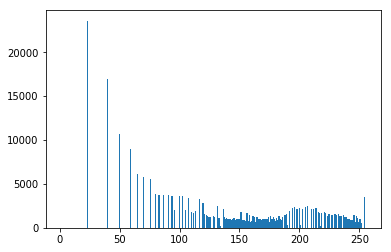

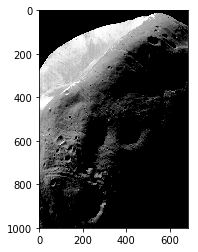

In [37]:
height=img_array.shape[0]
width=img_array.shape[1]
img_new_array=np.zeros((height,width),dtype=int)
for i in range(height):
    for j in range(width):
        if(img_array[i,j]!=0):
            img_new_array[i,j]=round(hist[img_array[i,j]])

plt.figure()
ar = img_new_array.flatten()
plt.hist(ar,bins = 256,range=(1,255))
#img_new = Image.fromarray(img_new_array)
plt.figure()
plt.imshow(img_new_array,'gray')